# [4、PyTorch的Dataset与DataLoader详细使用教程](https://www.bilibili.com/video/BV1yP4y1L7cC?spm_id_from=333.788.player.switch&vd_source=cdd897fffb54b70b076681c3c4e4d45d)

In [3]:
import torch
import torchvision as tv
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

dataset类用于从磁盘中获取数据集，映射成xy形式。
dataloader从dataset中获取数据，用于随机梯度下降，还会打乱、放入GPU等

## Dataset API

In [4]:
training_data = datasets.FashionMNIST(
    root="minist_dataset",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="minist_dataset",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


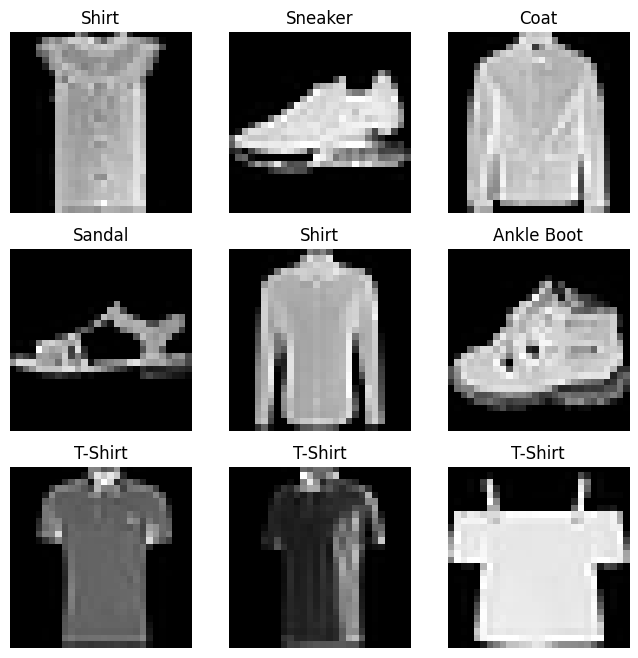

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img: torch.Tensor
    label: torch.Tensor
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 自定义Dataset

In [7]:
# 自定义Dataset
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    """
    这里是 map-style dataset
    数据集格式
    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9
    """
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """创建自定义Dataset,让其知道如何拿、处理数据
        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        """pytorch建议实现
        """
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Dataloader API

In [ ]:
from torch.utils.data import DataLoader
# batch_size：用于随机小批量梯度下降的大小
# shuffle：训练周期结束后打乱数据
# num_workers：是否使用辅助线程来加载数据，效率有待考究
# pin_memory：是否放到GPU中
# drop_last：最后的小批次丢掉
# collate_fn：对获取到的小批次再次后处理，例如 padding、
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)